# Filter wheel calibration display

## 1. Some initializations for ROOT and numpy, matplotlib

In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
fig_size = plt.rcParams["figure.figsize"]
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

f = ROOT.TFile('filterWheelCalibration.root')
if not ROOT.gROOT.FindObject('canv1'):
    c = ROOT.TCanvas('canv1', 'canv1', 600, 400)
if not ROOT.gROOT.FindObject('c1Split54'):
    cSplit54 = ROOT.TCanvas('c1Split54', 'c1Split54', 1350, 900)
    cSplit54.Divide(9,6)
if not ROOT.gROOT.FindObject('canv2'):
    c2 = ROOT.TCanvas('canv2', 'canv2', 600, 400)
if not ROOT.gROOT.FindObject('c2Split54'):
    c2Split54 = ROOT.TCanvas('c2Split54', 'c2Split54', 1350, 900)
    c2Split54.Divide(9,6)
ROOT.gStyle.SetTitleH(0.1);
plotted_objects = None
gain = np.zeros((54,2))

Welcome to JupyROOT 6.08/04


## 2. Some useful functions

In [2]:
# multipurpose single plot
def plot_gausFit(run_num, calo_num, xtal_num, canvas, grid_index=0):
    gausFit = ROOT.TH1D()
    gausFit = f.Get('calo{1}/xtal{2}/areaHist_calo{1}_xtal_{2}_run{0}'.format(run_num, calo_num, xtal_num))
    mean = gausFit.GetMean()
    rms = gausFit.GetRMS()
    gausFit.GetXaxis().SetRangeUser(mean-5*rms, mean+5*rms)
    gausFit.GetXaxis().SetNdivisions(5)
    gausFit.GetXaxis().SetTitleSize(0.05)
    gausFit.GetXaxis().SetLabelSize(0.06)
    gausFit.Draw()
    canvas.Draw()
    
# plot a single gaussian fit
def plot_single_gausFit(run_num, calo_num, xtal_num):
    ROOT.gStyle.SetOptStat(1110);
    c.cd()
    c.SetLogy(0)
    global plotted_objects
    plotted_objects = plot_gausFit(run_num, calo_num, xtal_num, c)
    
# plot a calorimeter-worth of gaussian fits
def plot_calo_gausFit(run_num, calo_num):
    ROOT.gStyle.SetOptStat(1110);
    # have to make sure objects are not garbage collected
    objects = []
    for xtal_num in xrange(54):
        cSplit54.cd(54 - xtal_num).Clear()
        cSplit54.cd(54 - xtal_num)
        objects.append(plot_gausFit(run_num, calo_num, xtal_num, cSplit54, 54 - xtal_num))
    global plotted_objects
    plotted_objects = objects
    
    # multipurpose single plot
def plot_calibration_curve(calo_num, xtal_num, canvas, grid_index=0):
    curve = f.Get('calo{0}/graphs/calibrationGraph{0}_{1}'.format(calo_num, xtal_num))
    pol = curve.GetFunction('pol2{0}_{1}'.format(calo_num, xtal_num))
    gain[xtal_num] = pol.GetParameter(1)
    curve.Draw("AP")
    canvas.Draw()
    
# plot a single crystal hit
def plot_single_curve(calo_num, xtal_num):
    c2.cd()
    c2.Clear()
    global plotted_objects
    plotted_objects = plot_calibration_curve(calo_num, xtal_num, c2)
    
# plot a calorimeter-worth of crystal hits
def plot_calo_curve(calo_num):
    # have to make sure objects are not garbage collected
    objects = []
    for xtal_num in xrange(54):
        c2Split54.cd(54 - xtal_num).Clear()
        c2Split54.cd(54 - xtal_num)
        objects.append(plot_calibration_curve(calo_num, xtal_num, c2Split54, 54 - xtal_num))
    global plotted_objects
    plotted_objects = objects
    
def get_gain(calo_num):
    for xtal_num in xrange(54):
        curve = f.Get('calo{0}/graphs/calibrationGraph{0}_{1}'.format(calo_num, xtal_num))
        pol = curve.GetFunction('pol2{0}_{1}'.format(calo_num, xtal_num))
        gain[xtal_num] = [xtal_num, 1.0/pol.GetParameter(1)]

## 3. Plot gaussian fits

## 3.1 Let's look at a single fit

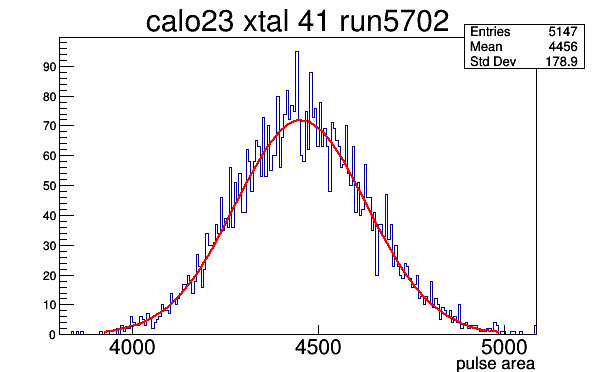

In [3]:
plot_single_gausFit(5702, 23, 41)

## 3.2 Let's look at the calo grid of the fits

### 3.2.1 Run 5702 is where the filter wheel setting is 1 (highest laser intensity).

### 3.2.1a Calorimeter 23

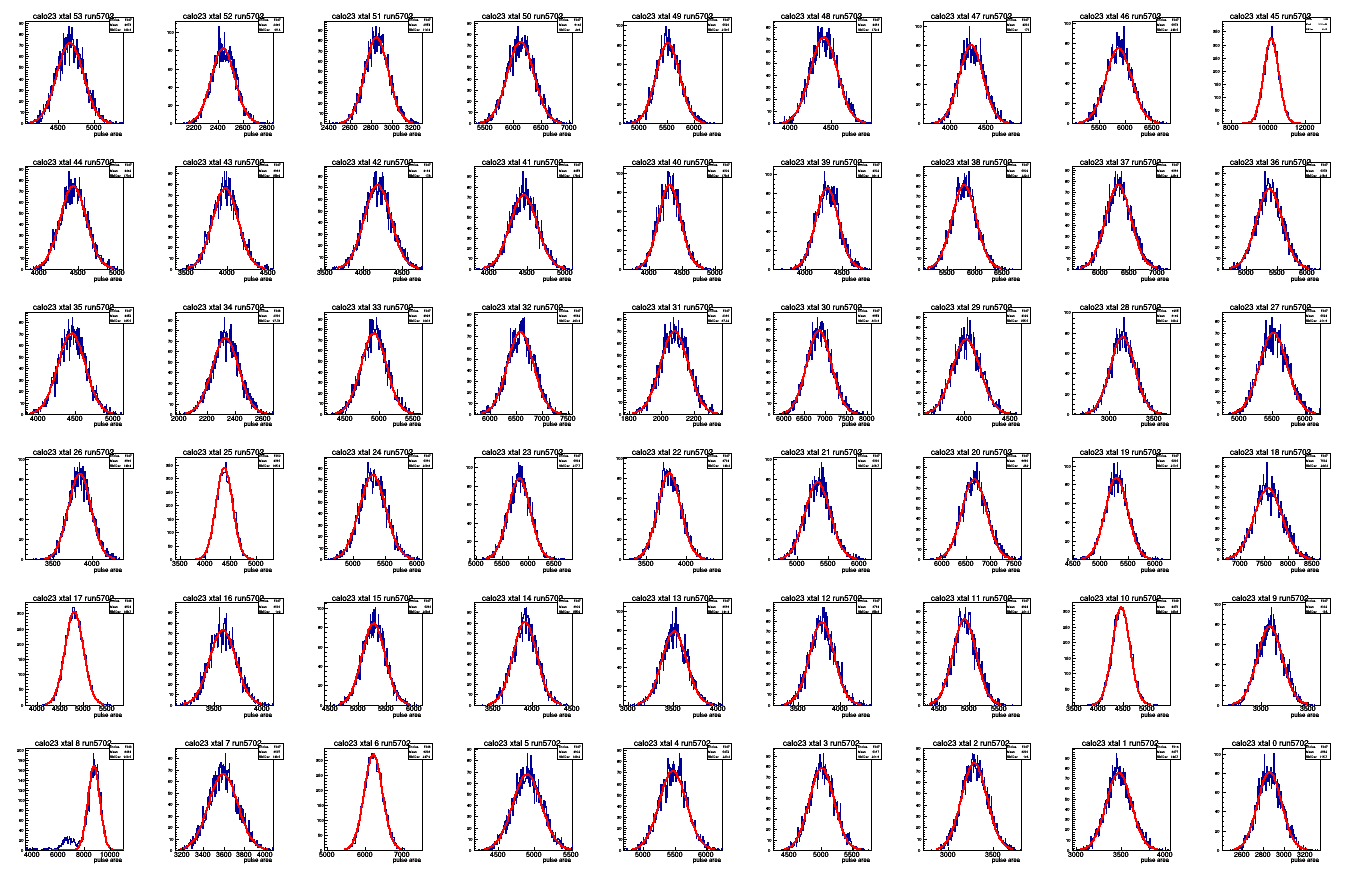

In [4]:
plot_calo_gausFit(5702, 23)

### 3.2.1b Calorimeter 24

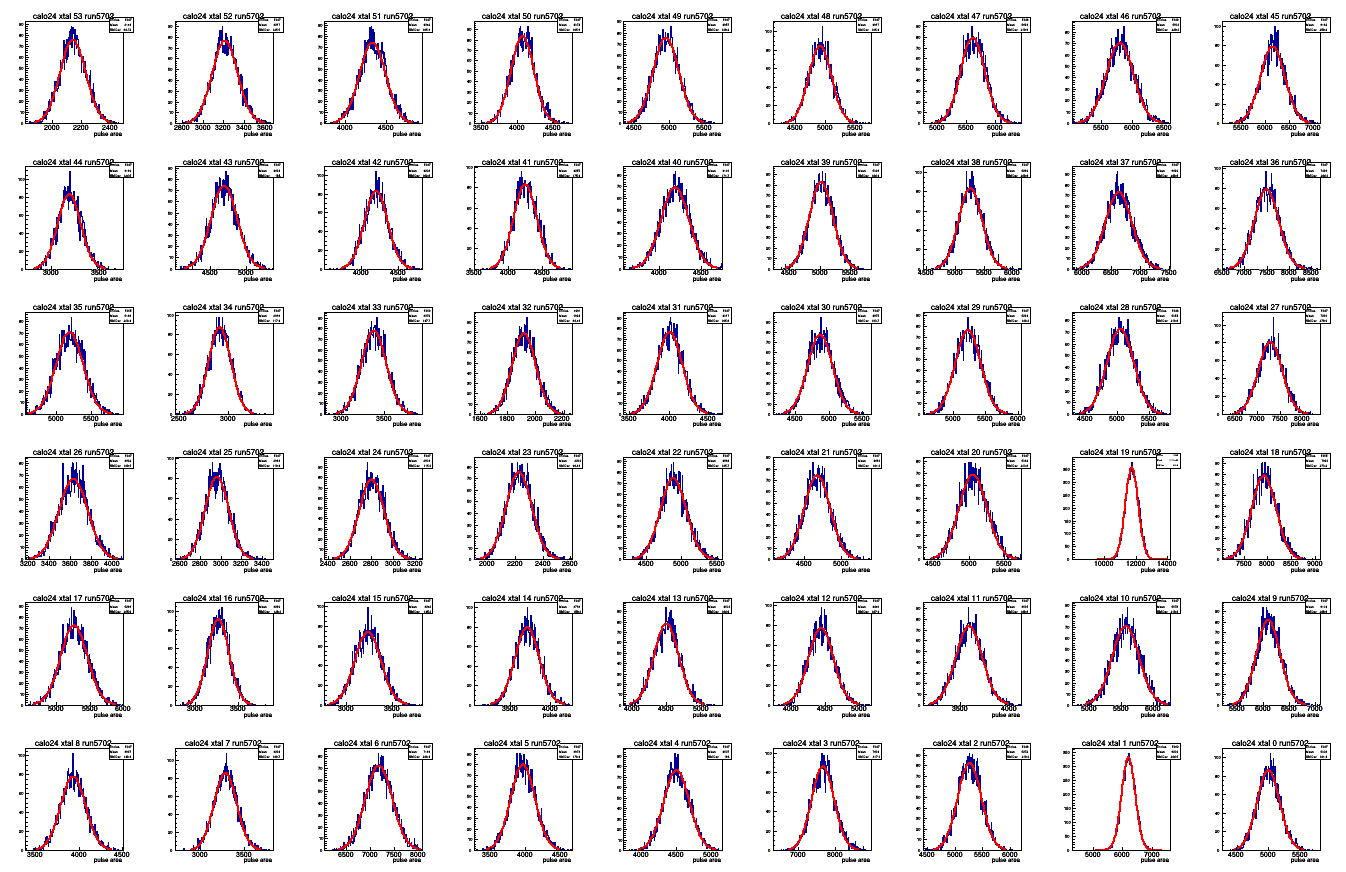

In [5]:
plot_calo_gausFit(5702, 24)

### 3.2.2 Run 5707 is where the filter wheel setting is 6 (lowest laser intensity). You can see that some of the fits are starting to fail.

### 3.2.2a Calorimeter 23

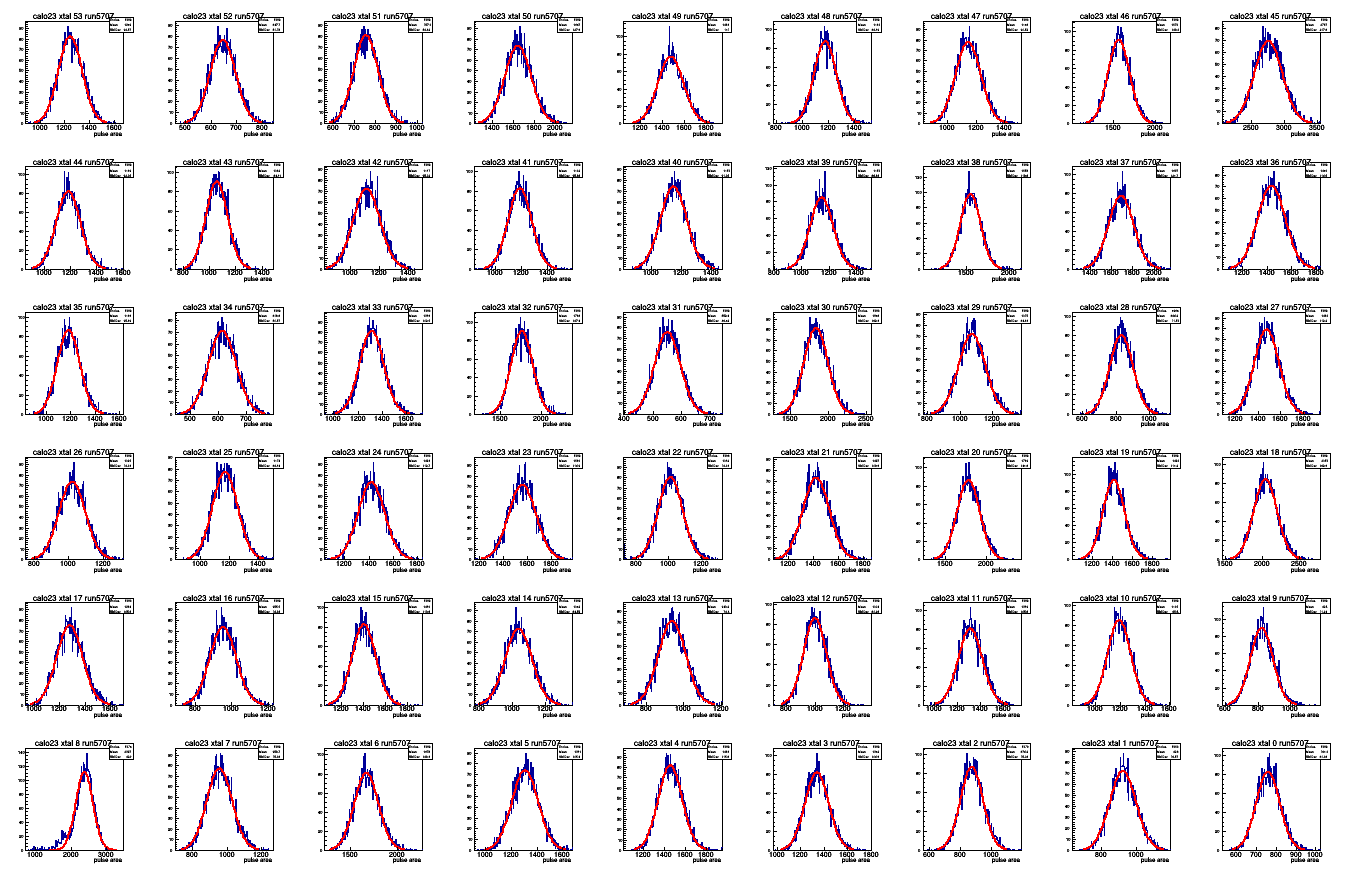

In [6]:
plot_calo_gausFit(5707, 23)

### 3.2.2b Calorimeter 24

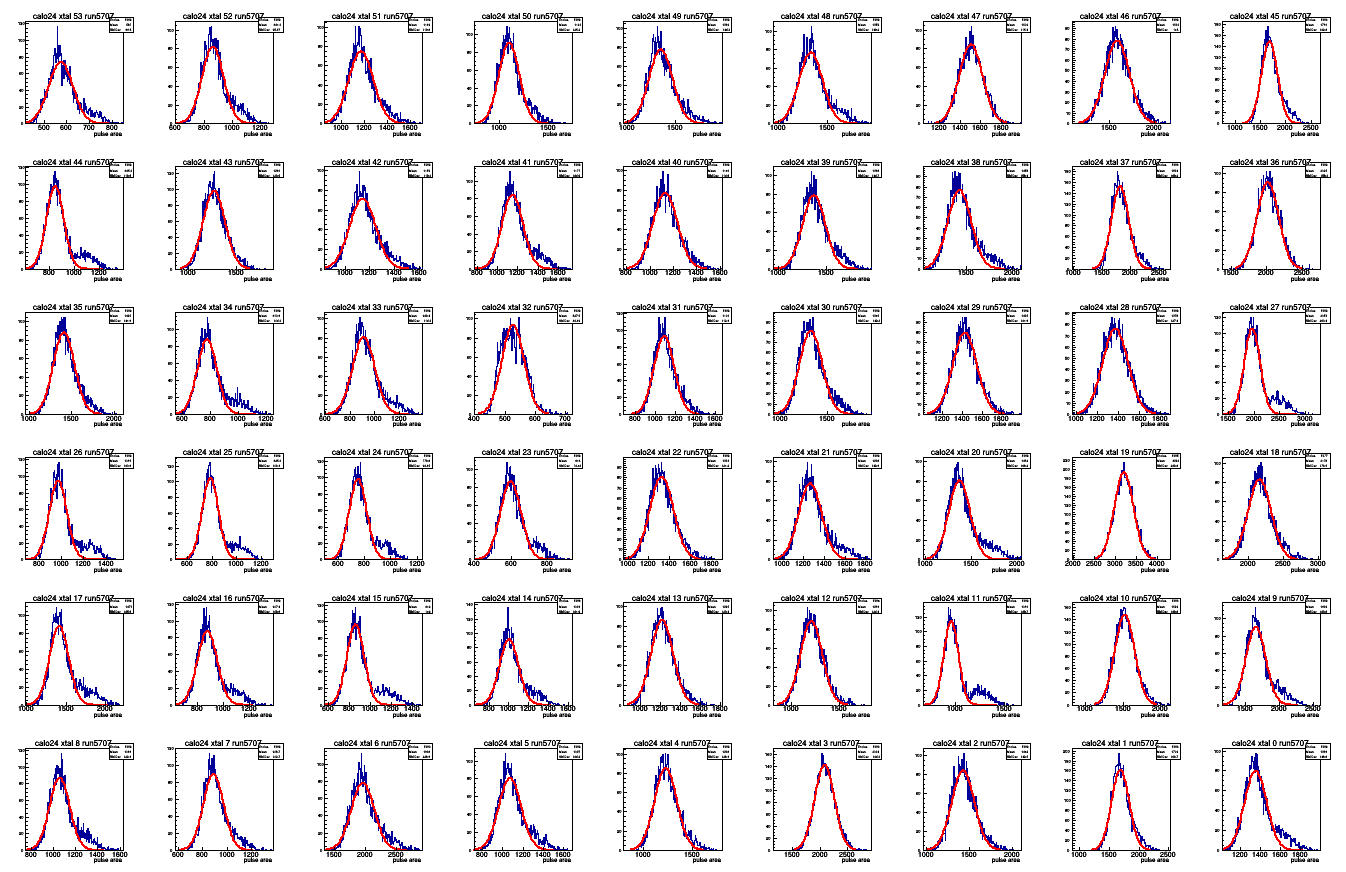

In [7]:
plot_calo_gausFit(5707, 24)

## 3.3 Calibration curve

### 3.3.1 Now let's look at one of the calibration curves.

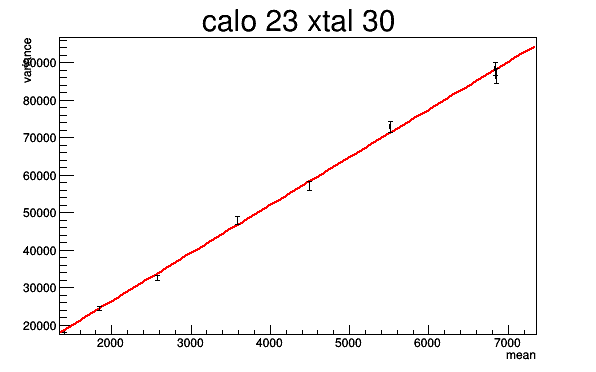

In [8]:
plot_single_curve(23, 30)

### 3.3.2 Calibration curve for the whole calorimeter

### 3.3.2a Calorimeter 23

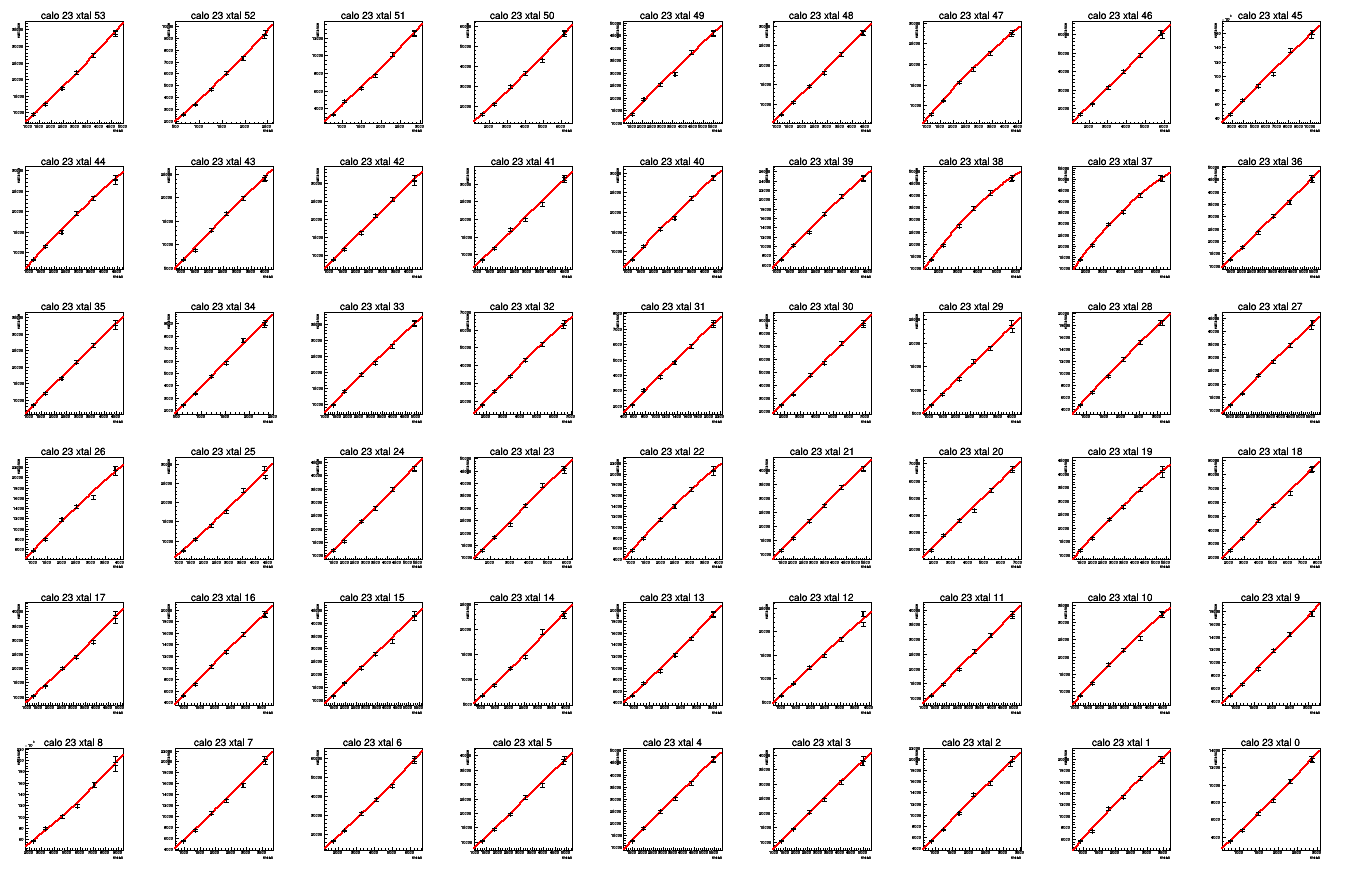

In [9]:
plot_calo_curve(23)

### 3.3.2b Calorimeter 24

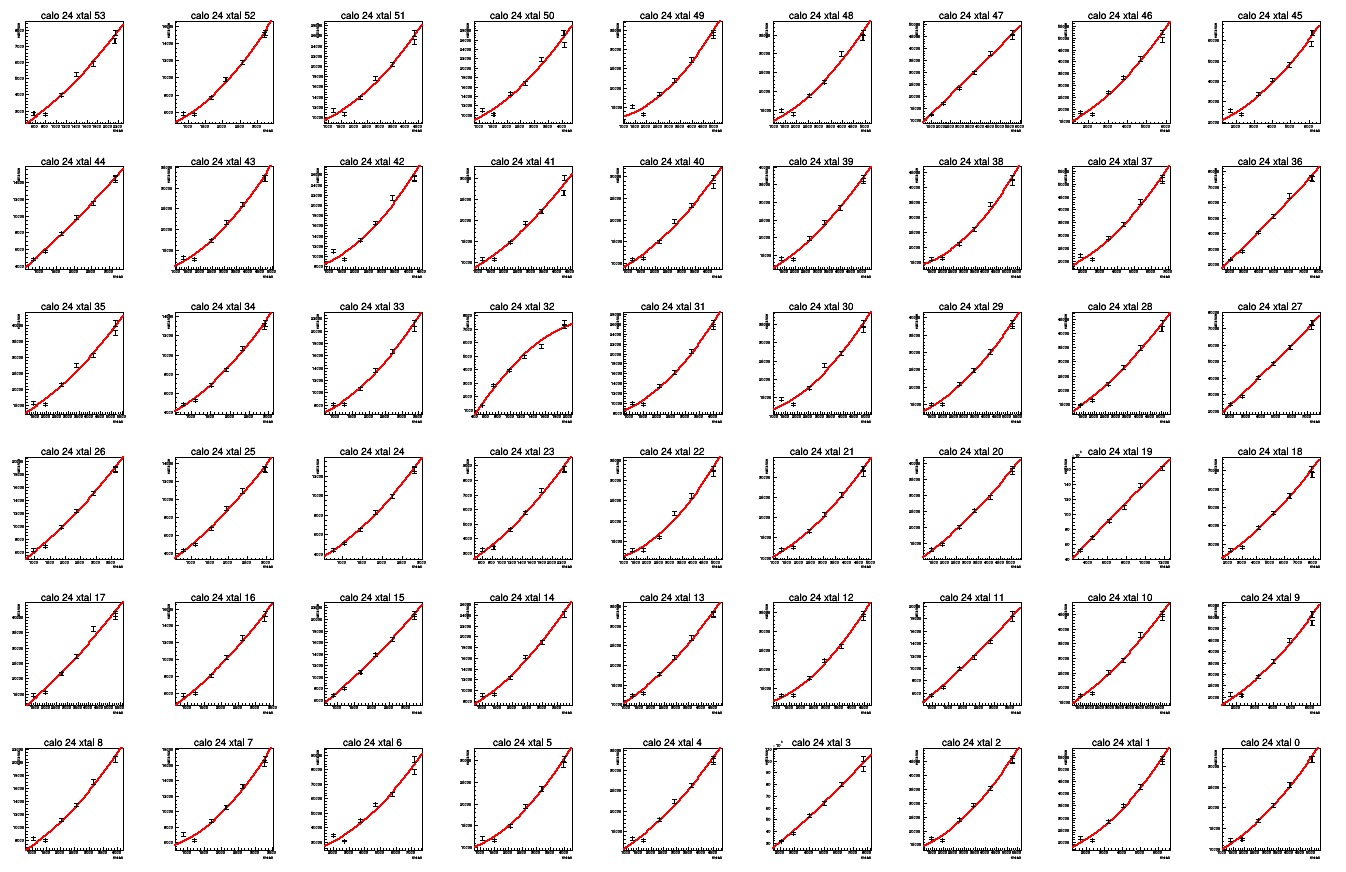

In [10]:
plot_calo_curve(24)

## 3.4 Plot gain versus crystal number

### Calo 23

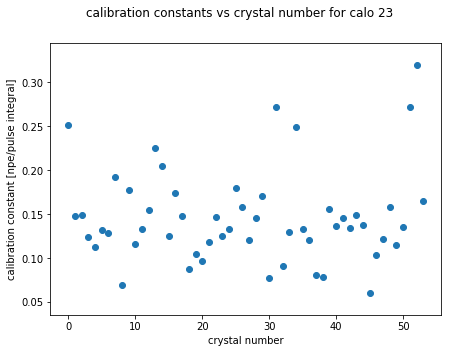

In [37]:
get_gain(23)
fig1 = plt.figure(figsize=(7,5))
ax1 = fig1.add_subplot(1, 1, 1)
x1 = gain[:,0]
y1 = gain[:,1]
fig1.suptitle('calibration constants vs crystal number for calo 23')
plt.xlabel('crystal number')
plt.ylabel('calibration constant [npe/pulse integral]')
ax1.scatter(x1, y1)
plt.draw()

### Calo 24

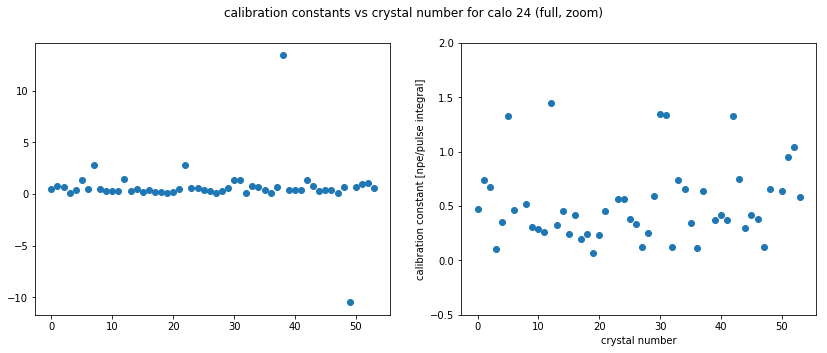

In [35]:
get_gain(24)
fig2 = plt.figure(figsize=(14,5))
ax2 = fig2.add_subplot(1, 2, 1)
ax3 = fig2.add_subplot(1, 2, 2)
fig2.suptitle('calibration constants vs crystal number for calo 24 (full, zoom)')
plt.xlabel('crystal number')
plt.ylabel('calibration constant [npe/pulse integral]')
x2 = gain[:,0]
y2 = gain[:,1]
ax3.set_ylim([-0.5,2])
ax2.scatter(x2, y2)
ax3.scatter(x2, y2)
plt.draw()